<h1 style="text-align:center">   
      <font color = blue >
                Students Performance: 📈 EDA and 📊 Visualization  
        </font>    
</h1>

<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray"> 



<center><h1 style ="background: #e60000;border:0;color:white">INTRODUCTION</h1></center><br>
<br>
<center><b><font color='black'>Hi! This is my first kernel and project. I benefited from many sources and learned a lot while preparing this kernel. I will be waiting for your feedback :). I will publish new versions with what I learned with your advice and feedback.</font></b></center>


<h2 style ="background:#333399;border:0;color:white"><b>Content:</b></h2>
<font color = #333399>  

1. [First Step](#0)
    * [Import The Required Libraries](#1)
    * [Load Dataset](#2)  
    * [Copy Real Dataset](#3)
    * [Data Frame Info And Missing Values](#4)
    * [First look](#5)
    * [Rename Columns](#6)
    * [Create a new column ("average_score")](#7)
    * [Describe Data Frame](#8)
    * [Create a new column ("grade")](#9)
    
    
2. [Visualization](#10)
    * [Grade Pie Chart](#11)
    * [Score Heatmap](#12)
    * [Let's compare Grades and Gender](#99)
    
    
3. [What I want to know ](#13)
    * [Q1: What is the effect of gender and education level on average score?](#14)
    * [Q2: What is the effect of gender and preparation course on average score?](#15)
    * [Q3: Which group is the most successful? (on average_score)](#16)

<a id = "0" ></a>

<a id="1"></a> <br>
<h2 style ="background:#c0f099;border:0;">Import The Required Libraries</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

sns.set_palette("tab10")

<a id="2"></a> <br>
<h2 style ="background:#c0f099;border:0;">Load Dataset</h2>

In [2]:
data = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

<a id="3"></a> <br>
<h2 style ="background:#c0f099;border:0;">Copy Real Dataset</h2>

In [3]:
df = data.copy()

<a id="4"></a> <br>
<h2 style ="background:#c0f099;border:0;">Data Frame Info And Missing Values</h2>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


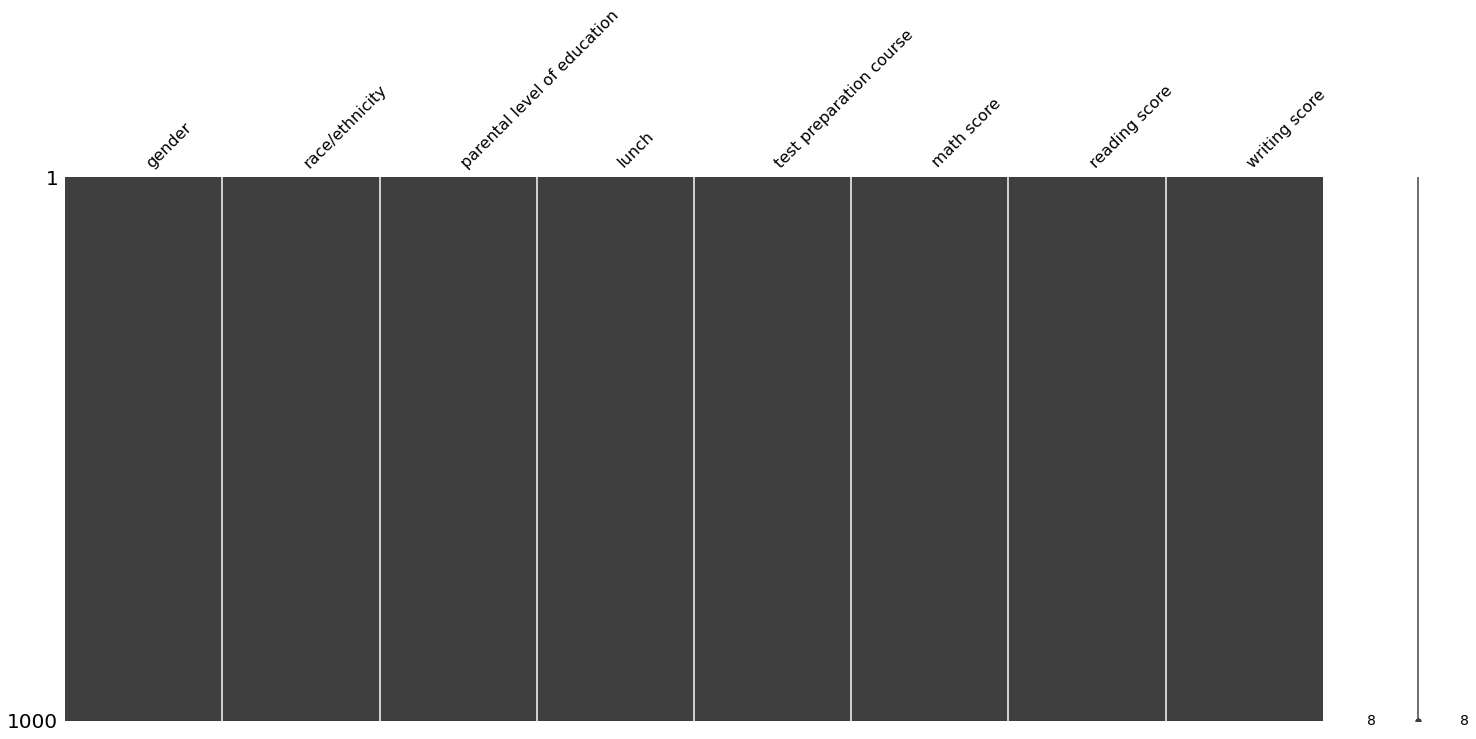

In [5]:
msno.matrix(df);

<font color=blue>>> </font><b>There seems to be no missing value</b>

<a id="5"></a> <br>
<h2 style ="background:#c0f099;border:0;">First look</h2>


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<font color=blue>>> </font><b>Data Frame looks okay. But it might be better if we change the column names.</b>

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<h2 style="text-align:center;"> Information About Columns</h2>
   <table style="width:100%">
     <tr>
       <th>Column Name</th>
       <th>Description</th>
    </tr>
    <tr>
       <td>gender</td>
       <td>Male/ Female</td>
    </tr>
     <tr>
    <td>race/ethnicity</td>
    <td>Group division from A to E</td>
  </tr>
  <tr>
    <td>parental level of education</td>
    <td>Details of parental education varying from high school to master's degree </td>
  </tr>
    <tr>
    <td>lunch</td>
    <td>Type of lunch selected</td>
  </tr>
    <tr>
    <td>test preparation course</td>
    <td>Course details</td>
  </tr>
    <tr>
    <td>math score</td>
    <td>Marks secured by a student in Mathematics</td>
  </tr>
    <tr>
    <td>reading score</td>
    <td>Marks secured by a student in Reading</td>
  </tr>
    <tr>
    <td>writing score</td>
    <td>Marks secured by a student in Writing</td>
  </tr>
</table>
<a id = "attribute" ></a>

<a id="6"></a> <br>
<h2 style ="background:#c0f099;border:0;">Rename columns names for easier reading</h2>

In [8]:
df.rename(inplace= True,
          columns={"race/ethnicity":"race_ethnicity",
                   "parental level of education":"education_level",
                   "test preparation course":"prep_course",
                   "math score":"math_score",
                   "reading score":"reading_score",
                   "writing score":"writing_score"})

<a id="7"></a> <br>
<h2 style ="background:#c0f099;border:0;">Create a new column called "average_score" to see the scores together</h2>

In [9]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

<a id="8"></a> <br>
<h2 style ="background:#c0f099;border:0;">Describe our dataset and understand basic information</h2>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
average_score,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


<font color=blue>>> </font><b>Mean and std values are very similar between scores. We will examine this later.</b>

<a id="9"></a> <br>
<h2 style ="background:#c0f099;border:0;">Let us create a new column called "grade" and assign the grades</h2>

In [11]:
def Grade(AverageScore):
    if (AverageScore >= 80):return 'A'
    if (AverageScore >= 70):return 'B'
    if (AverageScore >= 60):return 'C'
    if (AverageScore >= 50):return 'D'
    if (AverageScore >= 40):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["average_score"]), axis=1)

<a id = "10" ></a>

<a id="11"></a> <br>
<h2 style ="background:#c0f099;border:0;">Let's create a simple pie chart to see the grade distributions.</h2>

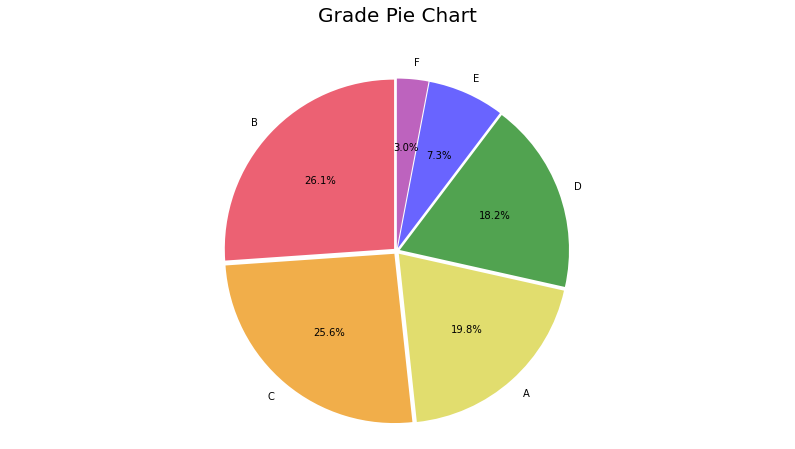

In [12]:
plt.figure(figsize=(14, 7))
labels=df['grade'].value_counts().index
plt.pie(df['grade'].value_counts().values,labels=labels,explode=[0.02,0.02,0.02,0.02,0.02,0.02],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

<font color=blue>>> </font><b>The majority got "B" and "C" grades (% 51.7). If you remember when we describe the data frame, we already saw it. The mean value was 67. Also, "A" grade is high.</b>

<a id="99"></a> <br>
<h2 style ="background:#c0f099;border:0;">Let's compare Grades and Gender </h2>

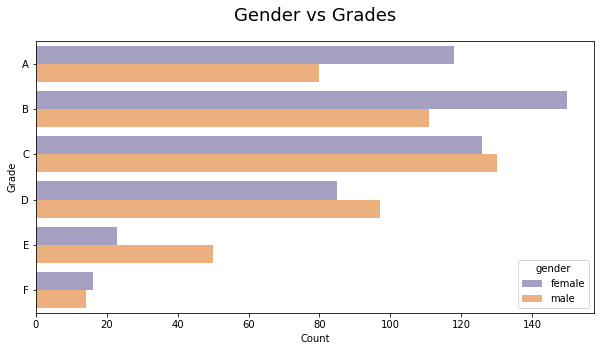

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="grade", hue="gender", data=df, order=["A","B","C","D","E","F"], palette="tab20c_r")
plt.title('Gender vs Grades', fontsize=18,pad=20)
plt.xlabel("Count")
plt.ylabel("Grade")
plt.show()

<a id="12"></a> <br>
<h2 style ="background:#c0f099;border:0;">Take a look at Score Heatmap</h2>

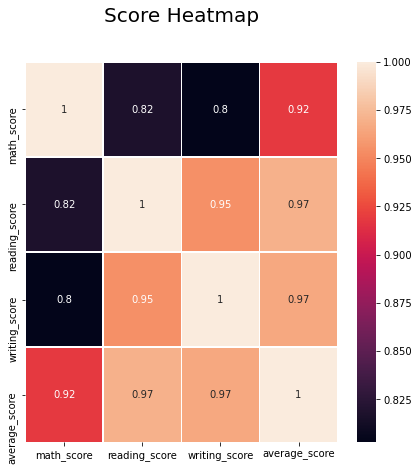

In [14]:
plt.figure(figsize=(7,7))
plt.title('Score Heatmap',color='Black',fontsize=20,pad=40)
sns.heatmap(df.corr(),annot=True,linewidths=.5);

<font color=blue>>> </font><b>I see that the scores are very close to each other. There is not much difference between them. Students seem to have an average success in all 3 areas(math,reading,writing).</b>

<a id="13"></a> <br>
<center><h1 style ="background: #e60000;border:0;color:white">What I want to know</h1></center><br>

<a id="14"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q1: </font>What is the effect of gender and education level on average score?</h2>

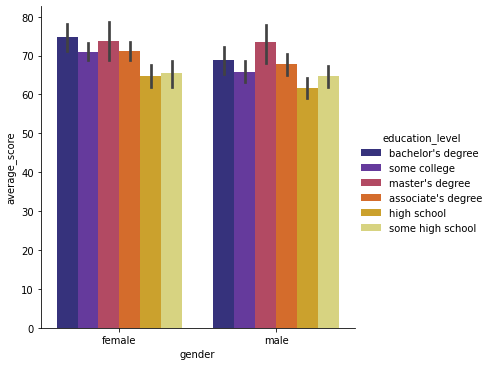

In [15]:
sns.catplot(data=df,x="gender",y="average_score",hue="education_level",kind="bar",height=5, palette="CMRmap");

<font color=blue>>> </font><b>Women with a bachelor's degree are more successful and the same can be said for women with a master's degree.
Men with a master's degree are more successful, but we cannot say this for men with a bachelor's degree.</b>

### -----------------------------------------------------------------------------------------

<a id="15"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q2: </font>What is the effect of gender and preparation course on average score?</h2>

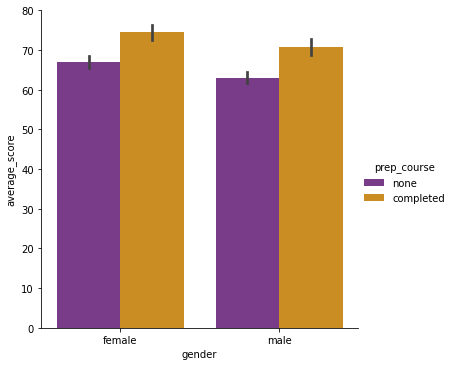

In [16]:
sns.catplot(data=df,x="gender",y="average_score",hue="prep_course",kind="bar",height=5,palette="CMRmap");

<font color=blue>>> </font><b>Students who complete the preparation course are more successful. However, I think this difference is not a big deal</b>

### -----------------------------------------------------------------------------------------

<a id = "16" ></a>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q3:</font> Which group is the most successful? (on average_score)</h2>


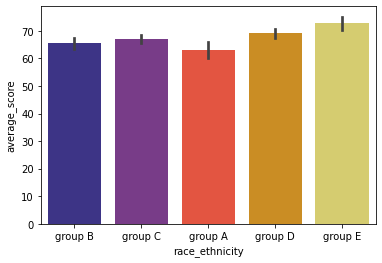

In [17]:
sns.barplot(x='race_ethnicity',y='average_score',data=df,palette="CMRmap");

<font color=blue>>> </font><b>group E is the most successful group. However, why?. I will do some research.</b>

In [18]:
df.groupby("race_ethnicity")["education_level"].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,6,some high school,24
group B,190,6,high school,48
group C,319,6,associate's degree,78
group D,262,6,some college,67
group E,140,6,associate's degree,39


In [19]:
df.groupby("race_ethnicity")["prep_course"].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,2,none,58
group B,190,2,none,122
group C,319,2,none,202
group D,262,2,none,180
group E,140,2,none,80


In [20]:
df.groupby("race_ethnicity")["grade"].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,6,D,24
group B,190,6,C,58
group C,319,6,B,87
group D,262,6,B,79
group E,140,6,A,44


<font color=blue>>> </font><b>I looked at the "education_level, prep_course, grade" data of group E and I couldn't get anything from the "education_level, prep_course" values, but when I look at the "grade" values, the A grade frequency of "group E" is 44 (% 61.6 of group e students are A have grade). I think I found out why group E was successful</b>

<b>in this case, we can look at their distribution</b>

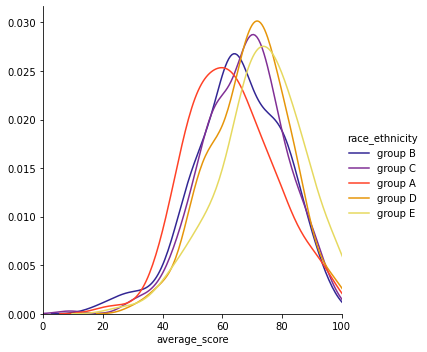

In [21]:
(sns
 .FacetGrid(df,
              hue="race_ethnicity",palette="CMRmap",
              height=5,
              xlim = (0,100))
 .map(sns.kdeplot, "average_score")
 .add_legend());

<font color=blue>>> </font><b>Certainly group e is much more successful than other students on "average_score".</b>

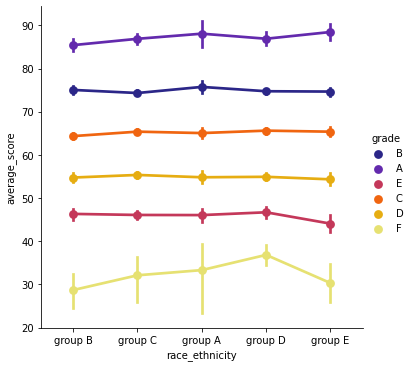

In [22]:
sns.catplot(x="race_ethnicity",y="average_score",hue="grade",kind="point",data=df,palette="CMRmap");

<font color=blue>>> </font><b>If you look at "group E" carefully, we can see that the number of students with low grades is low, but the number of students with high grades is high.</b>

**In this case, we are now confident that "group E" students are successful with a noticeable difference.**


<center><h2 style ="background:#fddcc6;border:0;">If you like this notebook an upvote will be appreciated.</h2></center>